In [1]:
# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
import seaborn as sns
from sklearn.metrics import r2_score, classification_report
%matplotlib inline

# Regression

In [3]:
#Read data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Boston.csv',
                index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Model building

In [4]:
x = df.iloc[:,:-1]
y = df['medv']

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [4]:
#Evaluating regressor

In [6]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [9]:
print(f"R2 value: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 value: 0.906888990394633
MSE: 9.201918009803913
RMSE : 3.033466335696494


In [7]:
ypred

array([29.821, 26.587, 19.393, 20.554, 19.681, 19.454, 27.639, 19.158,
       20.584, 23.499, 30.097, 30.704, 20.555, 19.923, 20.459, 26.471,
       12.03 , 41.036, 24.543, 14.399, 19.881, 16.394, 24.244, 23.696,
       25.116,  9.292, 14.452, 20.151, 42.425, 12.736, 25.927, 19.622,
       47.293, 15.748, 23.74 , 20.95 , 15.453, 33.808, 13.514, 19.835,
       24.455, 23.086, 25.586, 16.135, 15.501, 11.045, 47.818, 11.752,
       21.109, 18.574, 23.457, 21.173, 24.731, 20.968, 11.086, 23.689,
       11.311, 23.295, 19.098, 42.598, 14.174, 26.832, 13.574, 14.868,
       19.015, 32.659, 41.971, 25.245, 21.658, 20.43 , 23.802,  6.785,
       18.116, 21.476, 19.335, 20.559, 41.075, 23.991, 28.143, 32.972,
       17.487, 20.986, 34.543, 11.37 , 24.509, 25.318, 14.991, 24.289,
       20.013, 17.3  , 26.877, 43.714, 16.253, 21.332, 15.102, 20.833,
       23.997, 23.732, 42.342, 20.736, 15.587, 14.903])

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [5]:
#Plotting regressor

In [11]:
len(rf.estimators_)

100

In [13]:
rf.estimators_[99]

DecisionTreeRegressor(max_features='auto', random_state=812384738)

In [14]:
from sklearn import tree

[Text(0.5, 0.875, 'lstat <= 9.95\nsquared_error = 86.919\nsamples = 262\nvalue = 22.824'),
 Text(0.25, 0.625, 'rm <= 7.445\nsquared_error = 75.136\nsamples = 108\nvalue = 30.309'),
 Text(0.125, 0.375, 'dis <= 1.944\nsquared_error = 45.135\nsamples = 93\nvalue = 28.165'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'nox <= 0.683\nsquared_error = 58.151\nsamples = 15\nvalue = 43.446'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'lstat <= 17.155\nsquared_error = 24.267\nsamples = 154\nvalue = 17.33'),
 Text(0.625, 0.375, 'ptratio <= 13.85\nsquared_error = 9.099\nsamples = 89\nvalue = 20.099'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'crim <= 9.085\nsquared_error = 19.36\nsamples = 65\nvalue = 13.379'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

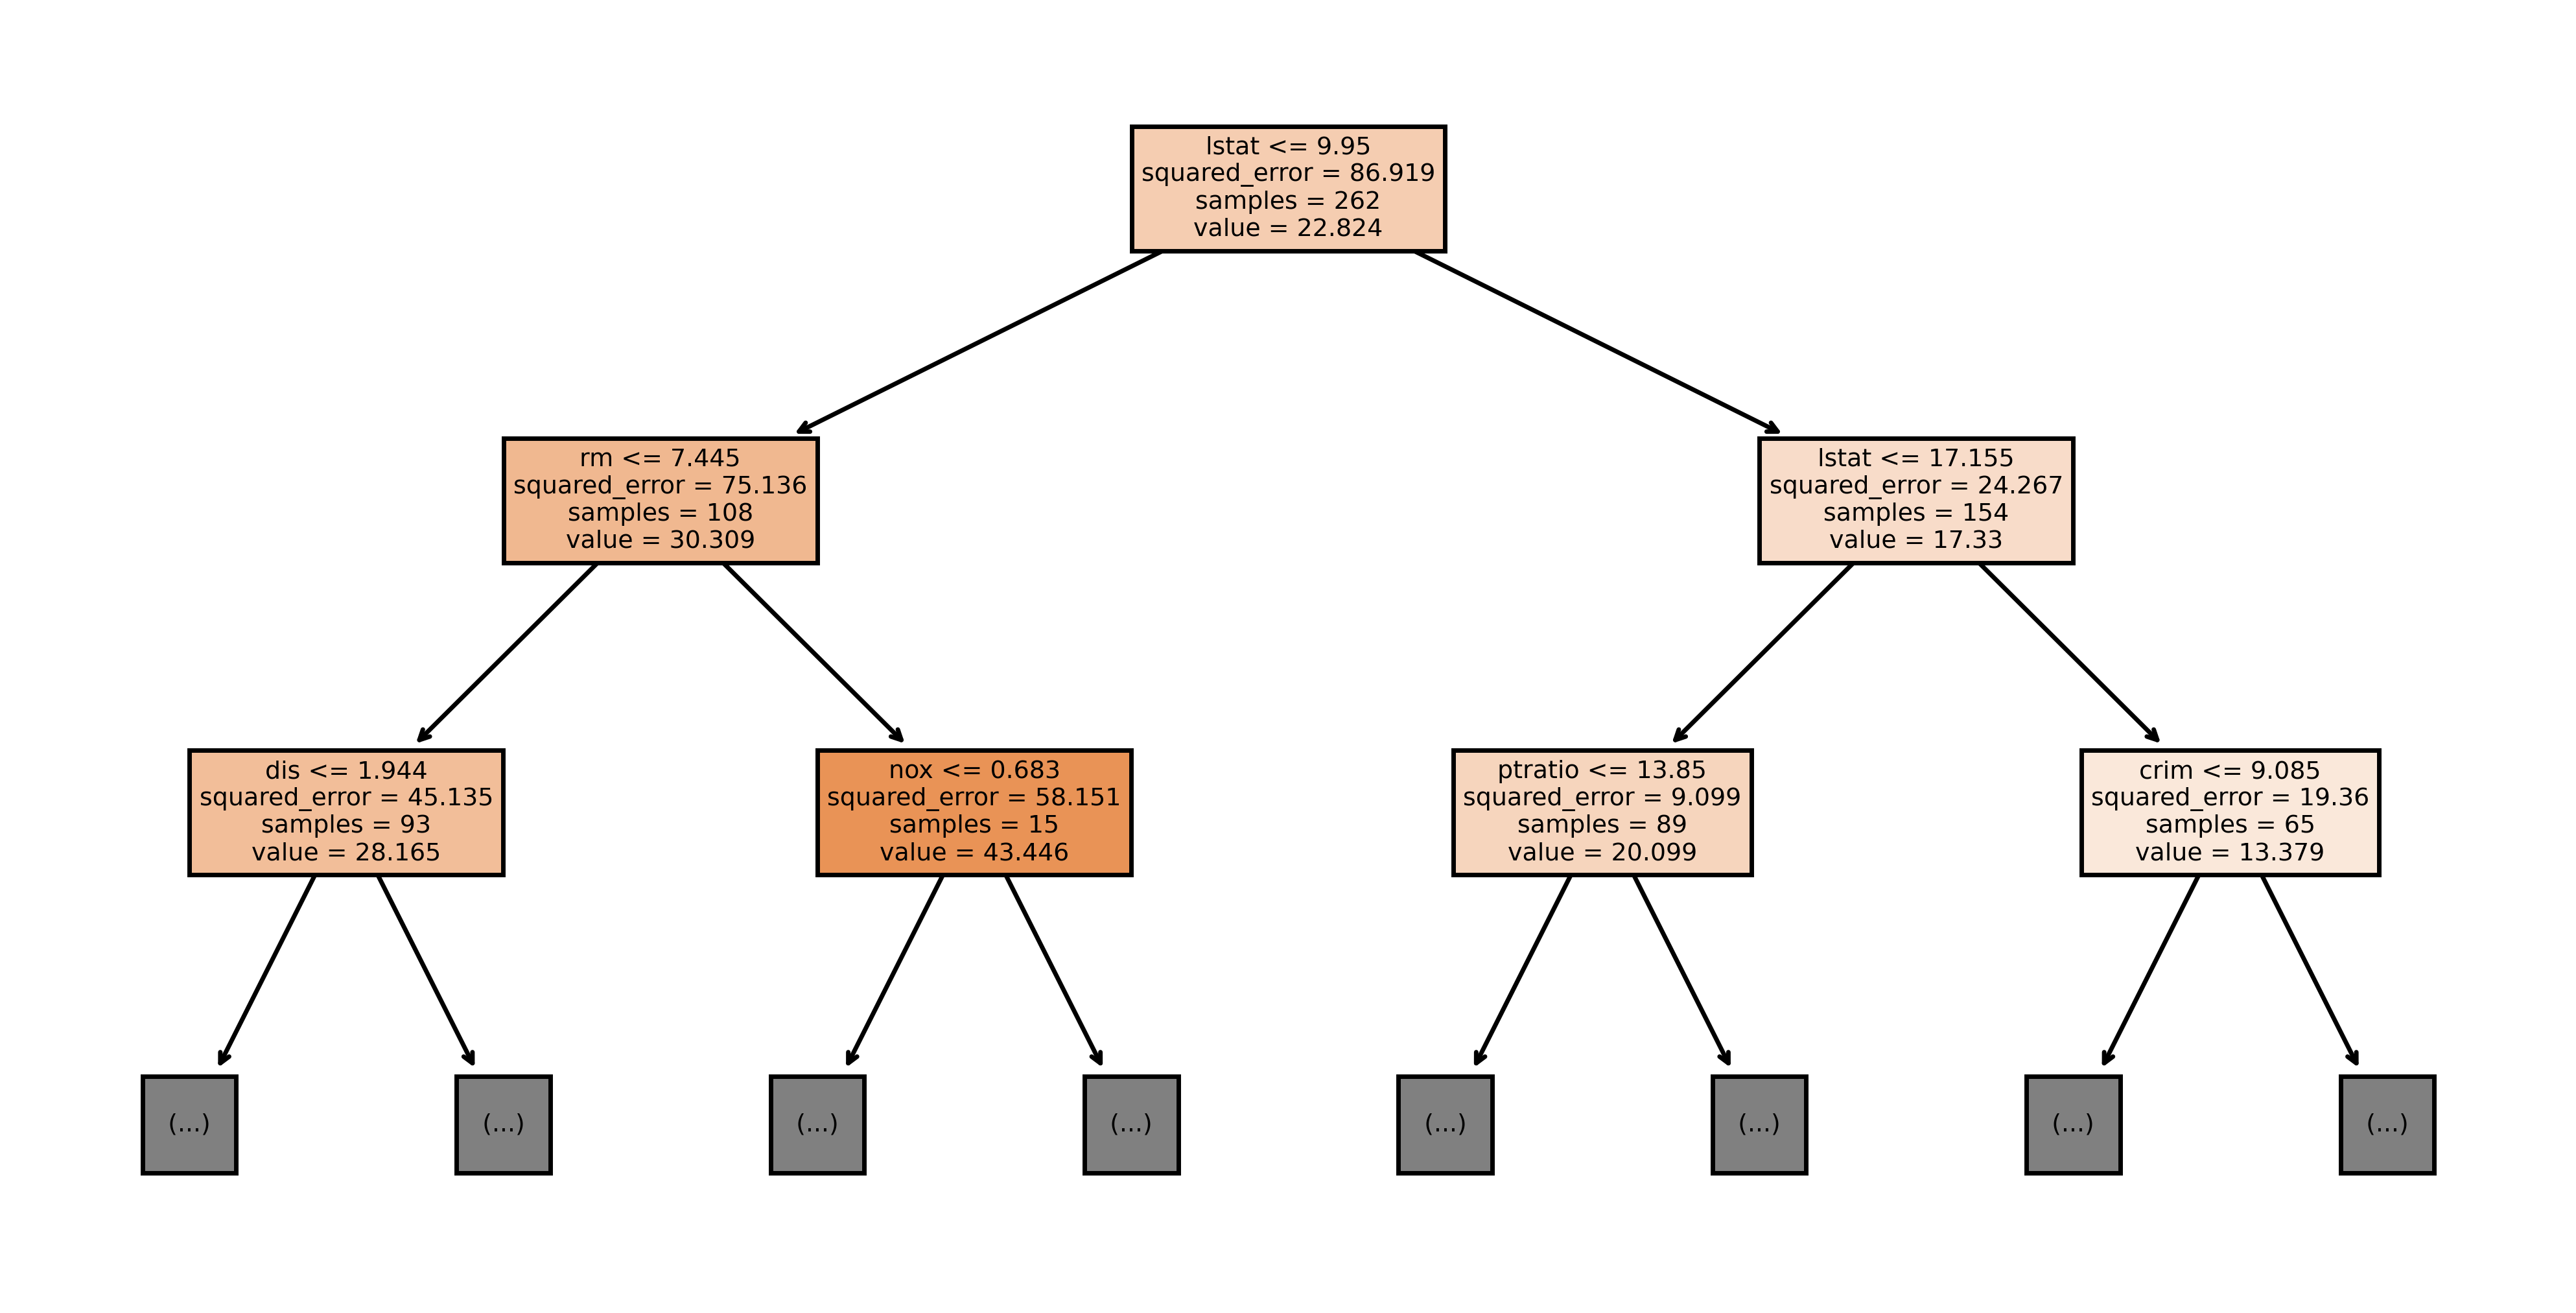

In [16]:
tree.plot_tree(rf.estimators_[1], feature_names=x.columns, filled=True, max_depth=2)

# Classification

In [6]:
#Read the dataset

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mobile_price_range.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

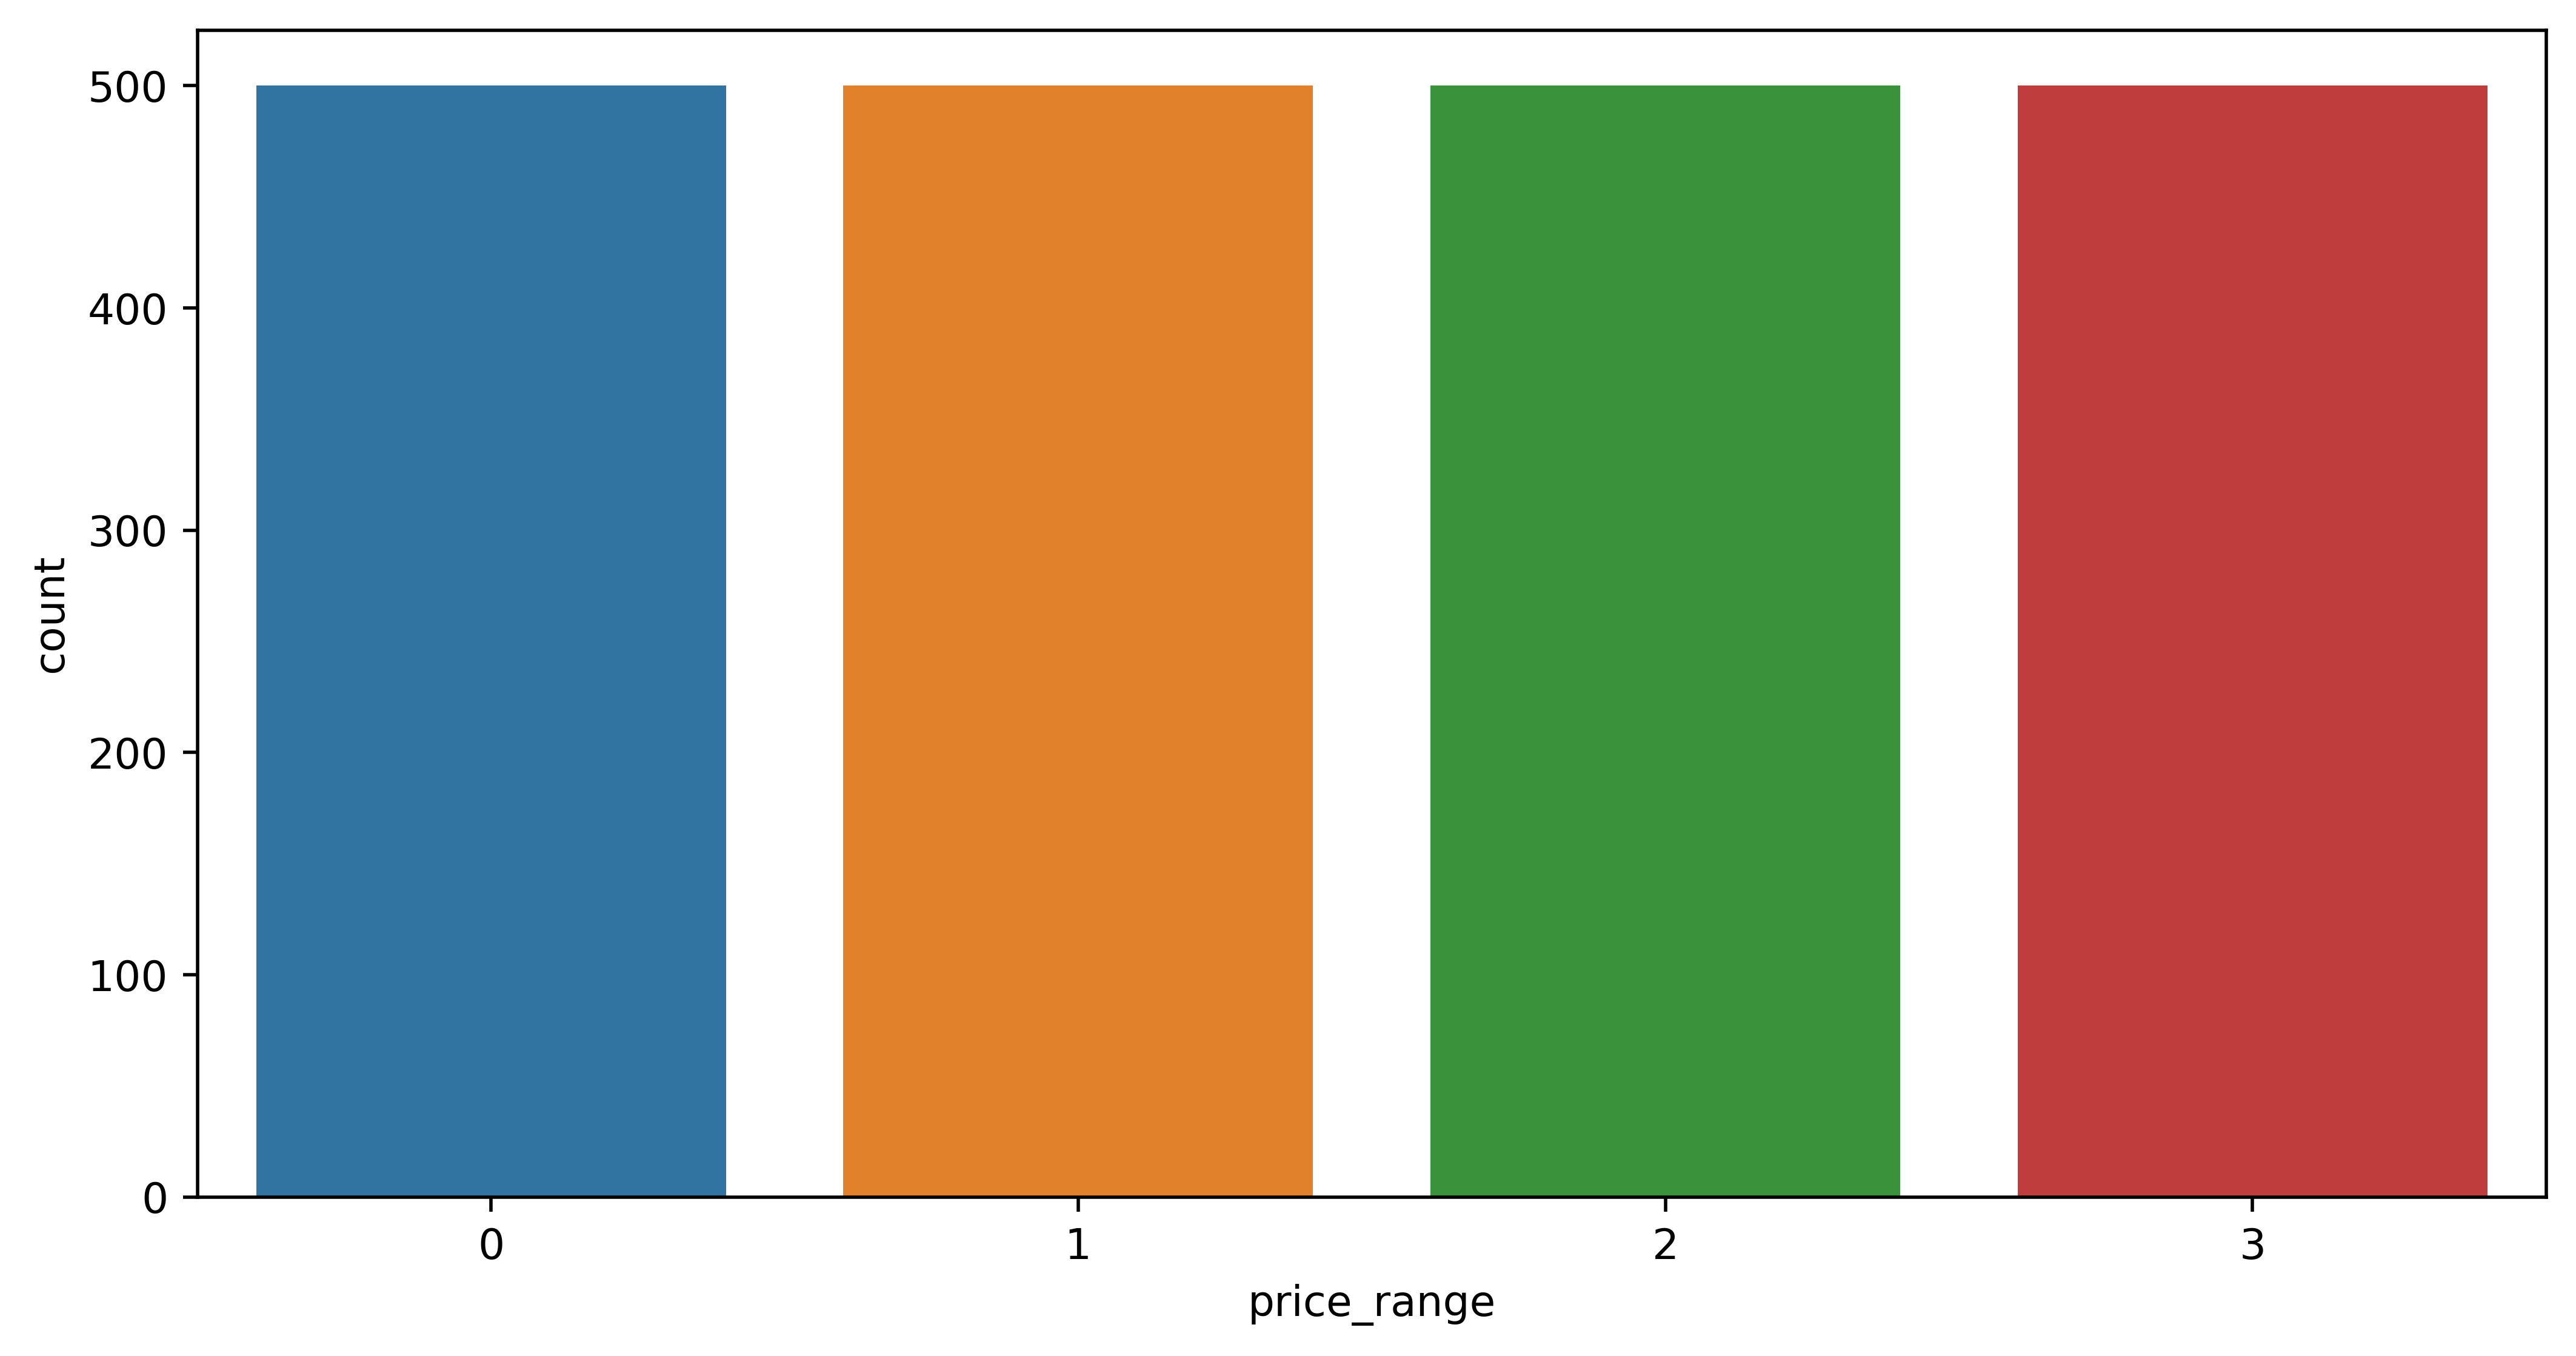

In [18]:
sns.countplot(df['price_range'])

In [19]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [20]:
df['price_range'].replace([0,1,2,3],['Low','Medium','High','Very High'],inplace=True)

In [21]:
df['price_range']

0          Medium
1            High
2            High
3            High
4          Medium
          ...    
1995          Low
1996         High
1997    Very High
1998          Low
1999    Very High
Name: price_range, Length: 2000, dtype: object

In [22]:
x = df.iloc[:,:-1]
y = df['price_range']

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [24]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [25]:
ypred = rfc.predict(xtest)
ypred

array(['Low', 'Low', 'Medium', 'Low', 'Very High', 'Medium', 'Low',
       'High', 'Very High', 'Very High', 'Low', 'Very High', 'Medium',
       'Medium', 'Very High', 'Low', 'Low', 'Medium', 'Medium', 'High',
       'Very High', 'Very High', 'Medium', 'High', 'Very High', 'High',
       'High', 'Very High', 'High', 'High', 'High', 'Medium', 'High',
       'Low', 'Very High', 'Very High', 'Low', 'Low', 'Medium', 'Low',
       'High', 'Low', 'High', 'Medium', 'Low', 'Medium', 'High', 'High',
       'Medium', 'High', 'Medium', 'Very High', 'Medium', 'Very High',
       'High', 'Very High', 'Medium', 'Very High', 'Very High', 'Medium',
       'Low', 'High', 'Medium', 'Very High', 'High', 'High', 'Low',
       'High', 'Very High', 'High', 'Medium', 'High', 'Low', 'Very High',
       'Very High', 'Medium', 'High', 'Medium', 'Low', 'Low', 'Low',
       'Very High', 'Medium', 'High', 'Very High', 'High', 'High', 'Low',
       'Medium', 'Medium', 'Very High', 'Low', 'Low', 'Medium', 'High',
 

In [7]:
#Evaluate model

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        High       0.81      0.86      0.83       106
         Low       0.88      0.92      0.90        92
      Medium       0.81      0.80      0.81        96
   Very High       0.96      0.87      0.91       106

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



In [8]:
#Visualize the model

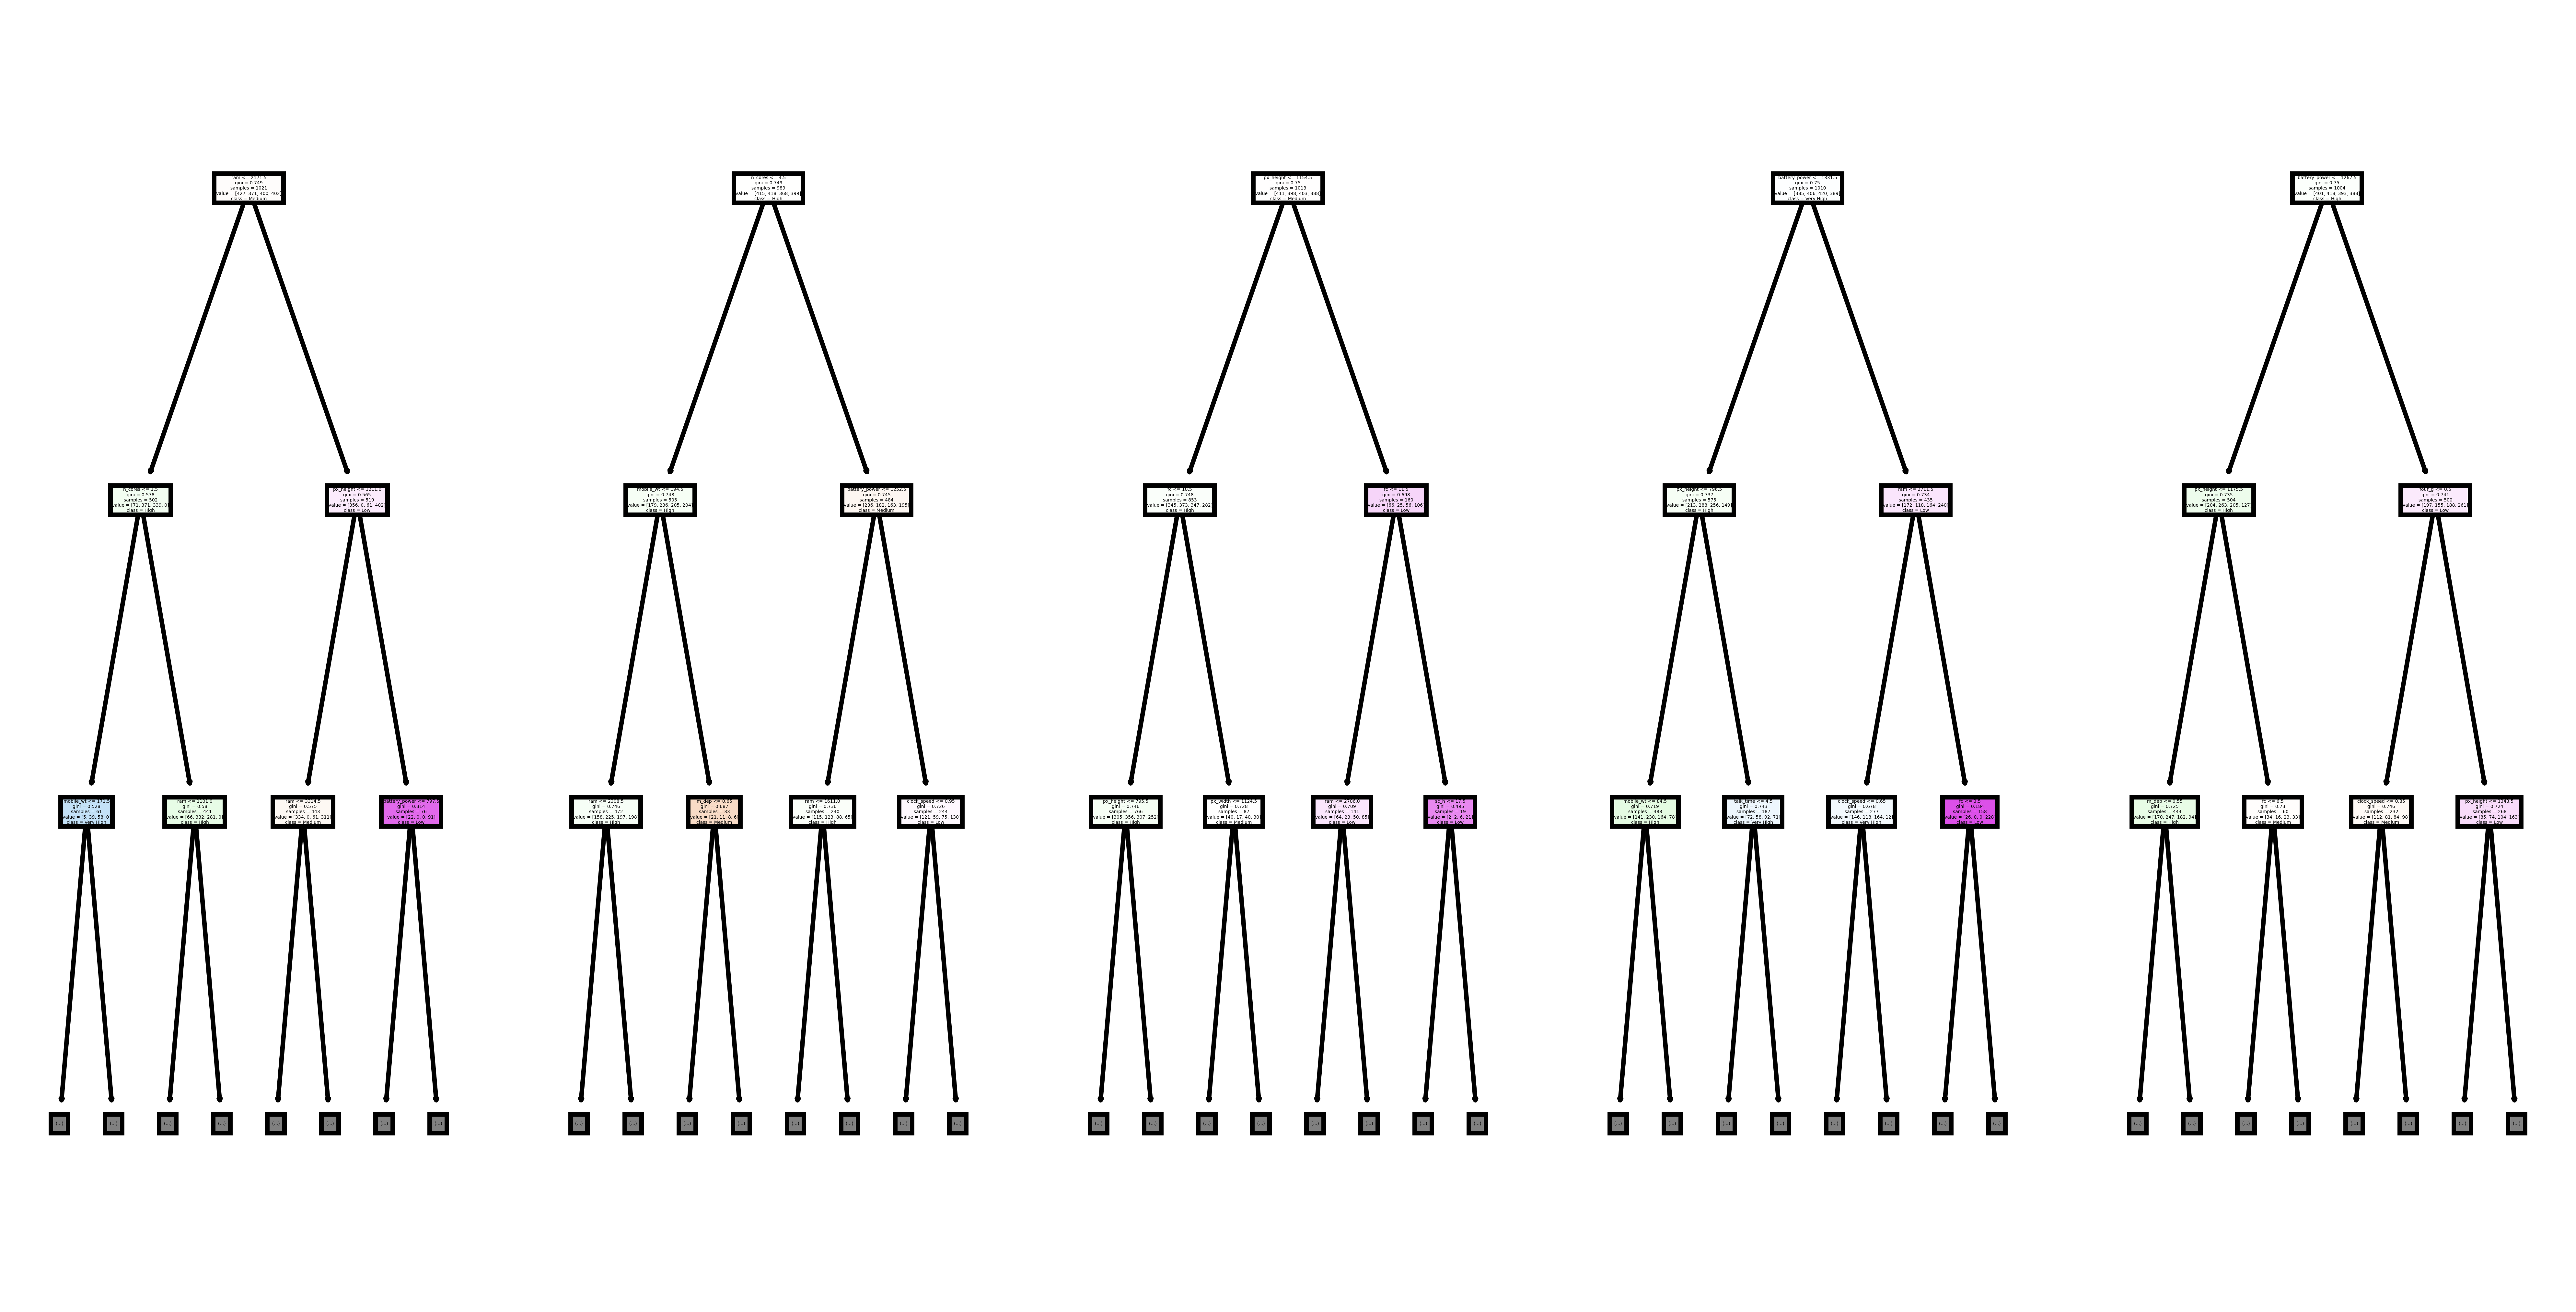

In [30]:
fig,index = plt.subplots(1,5, dpi = 1000)

for i in range(0,5):
    tree.plot_tree(rfc.estimators_[i],
                  feature_names=x.columns,
                  class_names=df['price_range'].unique(),
                   max_depth=2,
                   filled=True,
                  ax = index[i])

In [31]:
rfc.score(xtrain,ytrain),rfc.score(xtest,ytest)

(1.0, 0.8625)

# In-class activity
- Peform K-Fold cross validation on random forest classifier
- Perform hyperparameter tuning on Random Forest Classifier with following parameters:
    1. criterion
    2. max_depth
    3. min_samples_split
    4. max_features
    5. min_samples_leaf